<div style="text-align: justify">

##### We have Multiclass classification Problem. The objective of this form of supervised learning problem in machine learning is to classify instances into one of at least three classes. Thus, the output variable or target variable may have more than two possible outcomes. In a multiclass classification problem, the input data consists of a set of features or attributes, and the output variable is a categorical variable with multiple potential values or classes. 

##### This multiclass classification problem could entail classifying credit score into three distinct categories, such as "poor," "average,standard" and "good." In this situation, we are working with a multiclass classification problem, hence we cannot utilize a binary classification metrics. `Accuracy`, `Confusion Matrix`, `Correlation Plot`, and `F1 Score` are going to be the performance measurements that we use.

##### F1 scores range from 0 to 1, with 1 being the best. A model with a high F1 score has high precision and recall, avoiding false positives and negatives and properly recognizing significant data points. The average F1 score for a multiclass classification problem is calculated using the macro F1 score. The weighted F1 score takes class imbalance into consideration when calculating the average F1 score for a multiclass classification issue.



In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, f1_score

In [5]:
df = pd.read_csv('after_fe_outlier.csv')

In [6]:
x = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']
x

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History,Missed_Payment_Day
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3,4,3,...,1,809.98,26.822620,0,49.574949,80.415295,2,312.494089,265,1
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3,4,1,...,1,809.98,31.944960,0,49.574949,118.280222,3,284.629163,271,1
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3,4,3,...,1,809.98,28.609352,0,49.574949,81.699521,4,331.209863,267,1
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3,4,5,...,1,809.98,31.377862,0,49.574949,199.458074,5,223.451310,268,1
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3,4,6,...,1,809.98,24.797347,0,49.574949,41.420153,1,341.489231,269,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,9,39628.99,3359.415833,4.0,6.0,7,2,23,...,1,502.38,34.663572,0,35.104023,60.971333,0,479.866228,378,1
99996,5,25.0,9,39628.99,3359.415833,4.0,6.0,7,2,18,...,1,502.38,40.565631,0,35.104023,54.185950,1,496.651610,379,1
99997,6,25.0,9,39628.99,3359.415833,4.0,6.0,7,2,27,...,1,502.38,41.255522,0,35.104023,24.028477,0,516.809083,380,1
99998,7,25.0,9,39628.99,3359.415833,4.0,6.0,7,2,20,...,1,502.38,33.638208,0,35.104023,251.672582,3,319.164979,381,1


In [2]:
y_le = LabelEncoder()
y_Encode = y_le.fit_transform(y)

NameError: name 'LabelEncoder' is not defined

#### Defining Model Evaluation (using Confusion Matrix), Feature Importance and F1 Score Functions

In [5]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])
    fig, ax = plt.subplots(figsize=(5,5))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [6]:
def feature_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(15,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.gca().invert_yaxis()
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

In [7]:
def evaluate_f1_score(y_test, y_pred):
    # Calculate F1 score for each class
    f1_scores = f1_score(y_test, y_pred, average=None)
    print("F1 score for each class:", f1_scores)

    # Calculate and print macro-average F1 score
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    print("Macro-average F1 score:", macro_f1)

    # Calculate and print weighted-average F1 score
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    print("Weighted-average F1 score:", weighted_f1)

    return f1_scores, macro_f1, weighted_f1

In [8]:
features = df.drop(['Credit_Score'] , axis = 1)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

<div style="text-align: justify">

##### __`KNeighborsClassifier`__ and __`LogisticRegression`__ does not have a `feature_importances_` attribute, as it is not a tree-based models such as __`DecisionTreeClassifier`, `RandomForestClassifier`, `XGBoost` and `AdaBoost`__



### Logistic Regression

In [10]:
lr = LogisticRegression(C = 100)
lr.fit(x_train , y_train)
lr_score_train=lr.score(x_train , y_train)
lr_score_test=lr.score(x_test , y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
lr_score_train

0.5402571428571429

In [12]:
lr_score_test

0.5391333333333334

Training Accuracy Logistic Regression 54.02571428571429  Test Accuracy Logistic Regression 53.913333333333334


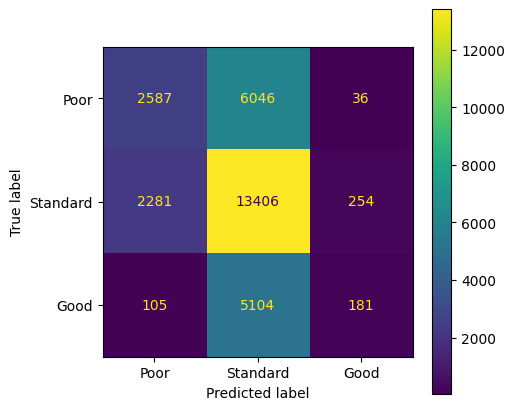

In [13]:
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

In [14]:
y_pred = lr.predict(x_test)

In [15]:
lr_f1_scores, lr_macro_f1, lr_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.3792699  0.66207373 0.0617642 ]
Macro-average F1 score: 0.36770261323050096
Weighted-average F1 score: 0.4724972409925777


In [16]:
pd.DataFrame((lr.coef_).T ,df.drop('Credit_Score',axis=1).columns ).T

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History,Missed_Payment_Day
0,-0.000017,-0.000263,-0.000025,-0.000026,0.000349,0.000029,0.000052,0.000295,0.000021,0.000466,...,-0.000013,0.000539,-0.000136,0.000006,-0.000211,-0.001036,2.922008e-08,-0.000513,-0.002341,-0.000004
1,0.000022,0.000270,0.000066,-0.000005,0.000011,0.000100,0.000046,0.000085,0.000037,0.000088,...,-0.000028,0.000193,0.000283,0.000026,0.000049,0.000559,3.130438e-05,0.000648,0.001045,0.000010
2,-0.000005,-0.000007,-0.000041,0.000031,-0.000361,-0.000129,-0.000097,-0.000380,-0.000057,-0.000554,...,0.000041,-0.000731,-0.000147,-0.000032,0.000161,0.000477,-3.133360e-05,-0.000135,0.001297,-0.000006


In [17]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,-1


### Decision Tree

In [18]:
dt = DecisionTreeClassifier(max_depth=12)
dt.fit(x_train , y_train)
dt_score_train=dt.score(x_train , y_train)
dt_score_test=dt.score(x_test , y_test)

In [19]:
dt_score_train

0.7739142857142857

In [20]:
dt_score_test

0.725

Training Accuracy DecisionTreeClassifier 77.39142857142856  Test Accuracy DecisionTreeClassifier 72.5


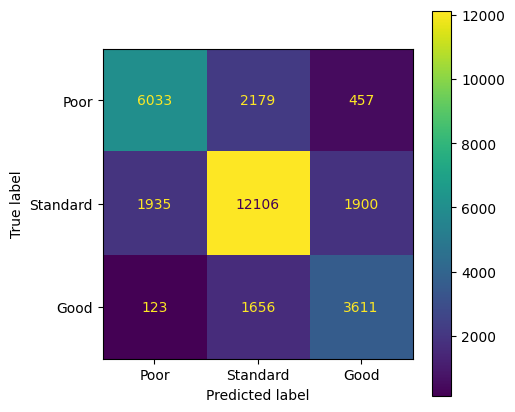

In [21]:
evaluate_classification(dt, "DecisionTreeClassifier", x_train,x_test,y_train,y_test)

In [22]:
y_pred = dt.predict(x_test)

In [23]:
dt_f1_scores, dt_macro_f1, dt_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.7199284  0.75942538 0.63585138]
Macro-average F1 score: 0.7050683881110157
Weighted-average F1 score: 0.7258099419465116


In [24]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,-1,1,0,0,0,0,0,0,-1,0,0,-1,0,0,0,-1,0,0


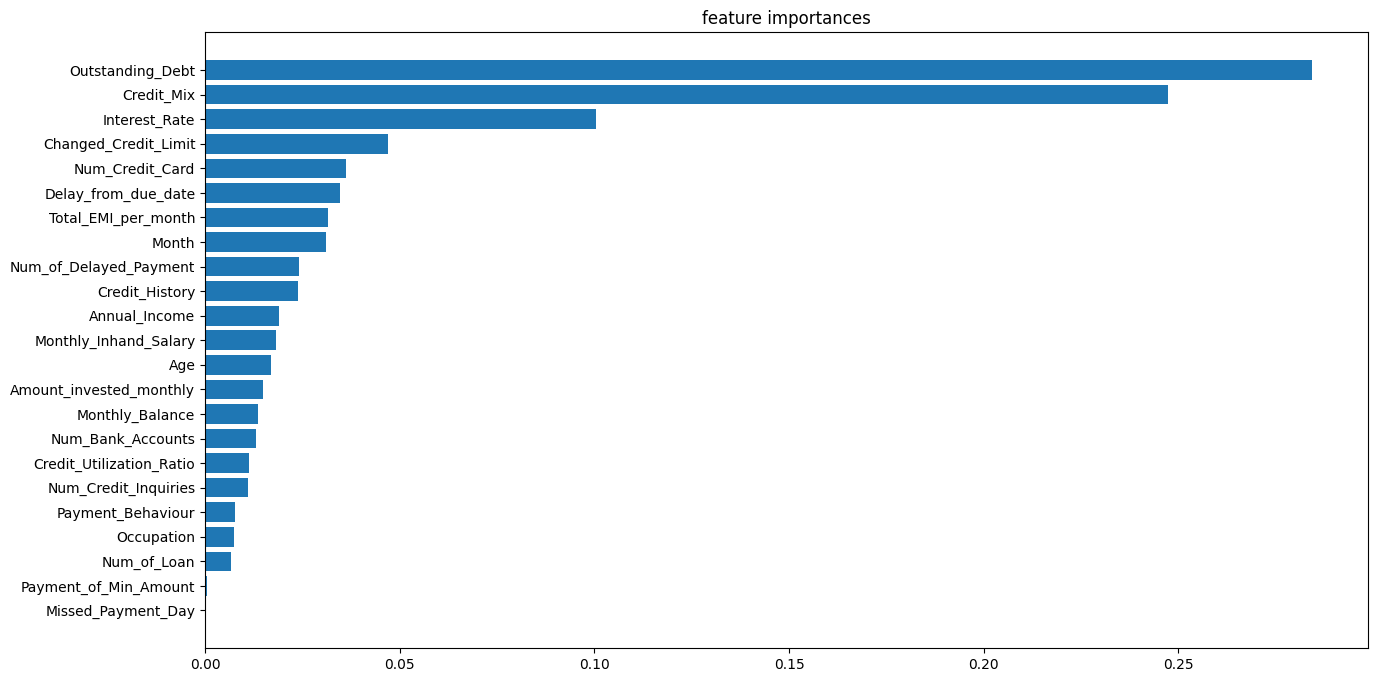

In [25]:
feature_importances(abs(dt.feature_importances_), features)

### KNN

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train , y_train)
knn_score_train=knn.score(x_train , y_train)
knn_score_test=knn.score(x_test , y_test)

In [27]:
knn_score_train

0.8085428571428571

In [28]:
knn_score_test

0.7163666666666667

Training Accuracy KNeighborsClassifiern 80.85428571428571  Test Accuracy KNeighborsClassifiern 71.63666666666667


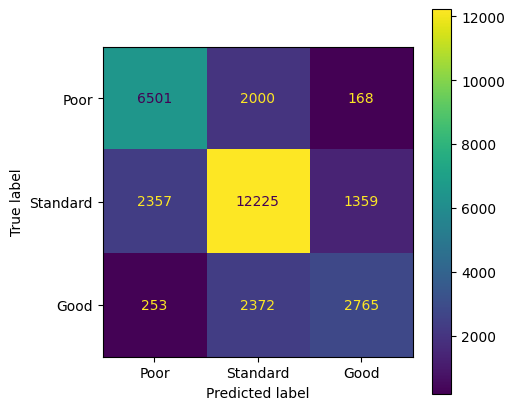

In [29]:
evaluate_classification(knn, "KNeighborsClassifiern", x_train,x_test,y_train,y_test)

In [30]:
y_pred = knn.predict(x_test)

In [31]:
knn_f1_scores, knn_macro_f1, knn_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.73127109 0.7514291  0.57116298]
Macro-average F1 score: 0.684621057417825
Weighted-average F1 score: 0.7132162940737886


In [32]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,0,0,0,0,0,0,0,0,-1,1,0,-1,1,0,0,0,1,-1


### Random Forest

In [33]:
rf = RandomForestClassifier(max_depth=12)
rf.fit(x_train , y_train)
rf_score_train=rf.score(x_train , y_train)
rf_score_test=rf.score(x_test , y_test)

In [34]:
rf_score_train

0.7809142857142857

In [35]:
rf_score_test

0.7403666666666666

Training Accuracy RandomForestClassifier 78.09142857142857  Test Accuracy RandomForestClassifier 74.03666666666666


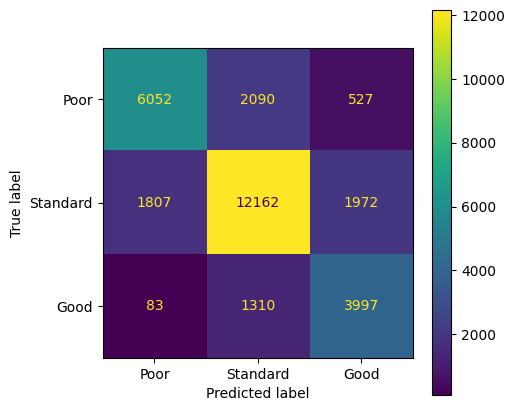

In [36]:
evaluate_classification(rf, "RandomForestClassifier", x_train,x_test,y_train,y_test)

In [37]:
y_pred = rf.predict(x_test)

In [38]:
rf_f1_scores, rf_macro_f1, rf_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.72867377 0.77211694 0.67255595]
Macro-average F1 score: 0.7244488866037089
Weighted-average F1 score: 0.7416755212187724


In [39]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,-1,1,0,0,0,0,1,0,-1,1,1,-1,0,0,0,0,0,-1


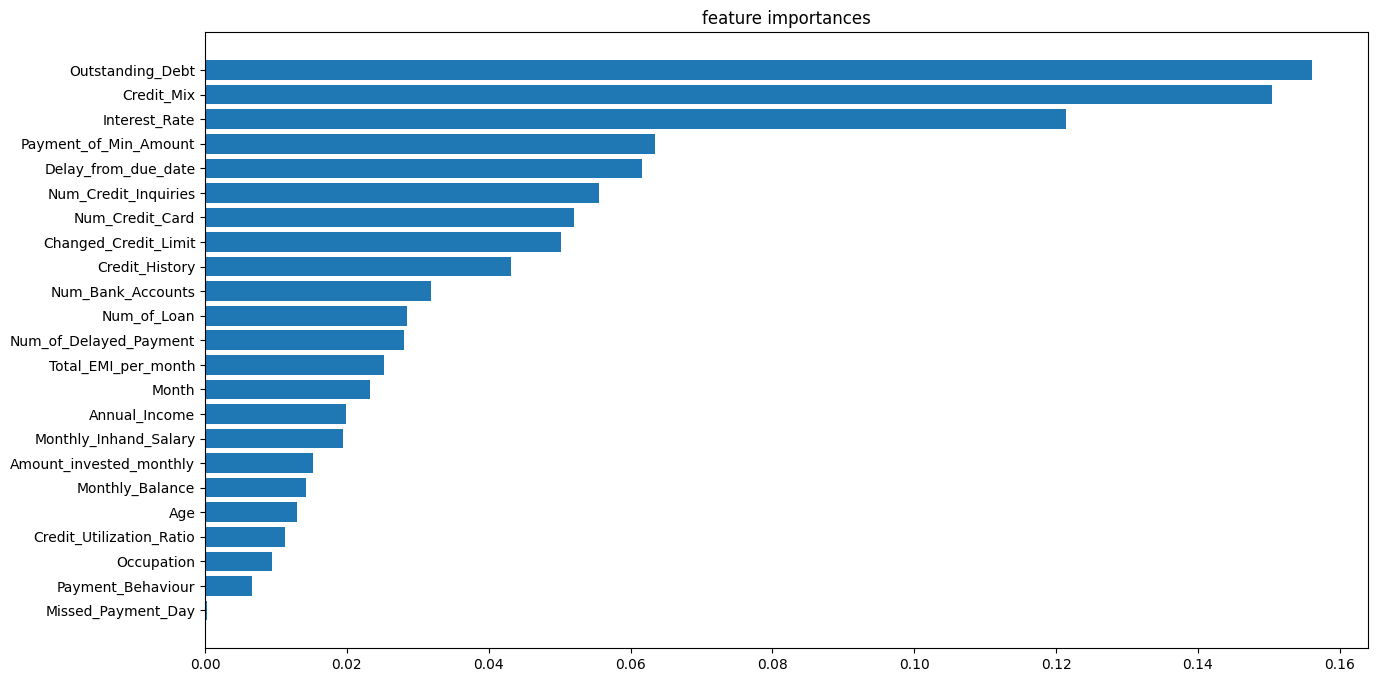

In [40]:
feature_importances(abs(rf.feature_importances_), features)

### AdaBoost

In [41]:
ada = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)
ada.fit(x_train, y_train)
ada_score_train=ada.score(x_train, y_train)
ada_score_test=ada.score(x_test, y_test)

In [42]:
ada_score_train

0.6279285714285714

In [43]:
ada_score_test

0.6267

Training Accuracy adaboost 62.79285714285714  Test Accuracy adaboost 62.67


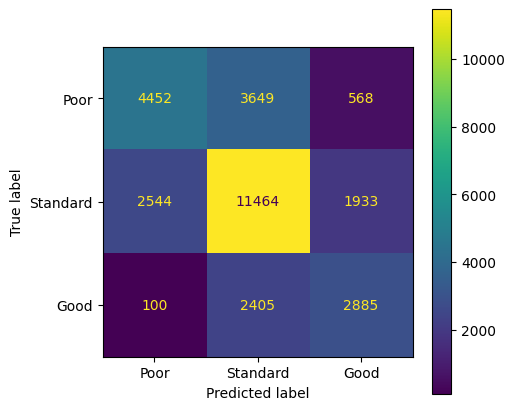

In [44]:
evaluate_classification(ada, "adaboost", x_train,x_test,y_train,y_test)

In [45]:
y_pred = ada.predict(x_test)

In [46]:
ada_f1_scores, ada_macro_f1, ada_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.56479543 0.68525658 0.53544915]
Macro-average F1 score: 0.5951670539517466
Weighted-average F1 score: 0.6235319230279707


In [47]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,-1,0,0,0,0,0,1,0,0,1,1,-1,0,0,-1,0,0,-1


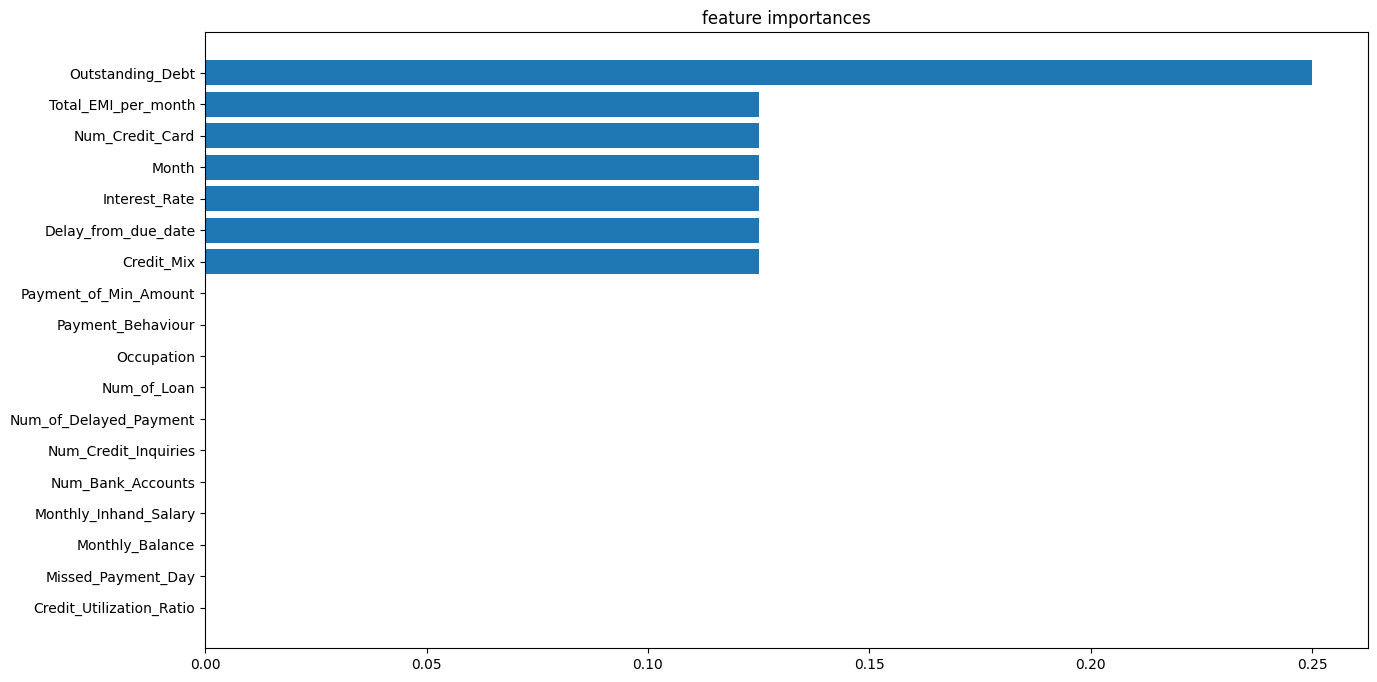

In [48]:
feature_importances(abs(ada.feature_importances_), features, top=18)

### XGBoost

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y_Encode, test_size=0.3,random_state = 1234)
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgb.fit(x_train , y_train)
xgb_score_train=xgb.score(x_train , y_train)
xgb_score_test=xgb.score(x_test , y_test)

In [50]:
xgb_score_train

0.7154571428571429

In [51]:
xgb_score_test

0.7141

Training Accuracy XGBOOST 71.5457142857143  Test Accuracy XGBOOST 71.41


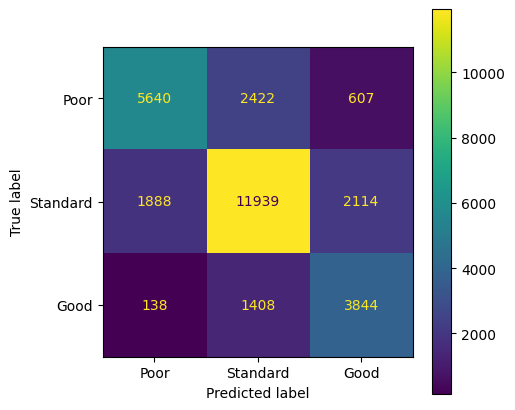

In [52]:
evaluate_classification(xgb, "XGBOOST", x_train,x_test,y_train,y_test)

In [53]:
y_pred = xgb.predict(x_test)

In [54]:
xgb_f1_scores, xgb_macro_f1, xgb_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.69054178 0.75301167 0.64307821]
Macro-average F1 score: 0.6955438865494409
Weighted-average F1 score: 0.7152085752839525


In [55]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,0,1,0,2,1,1,1,1,1,1,0,2,2,0,1,1,0,0,1,0
Y_pred,0,1,0,2,1,1,1,1,2,1,0,2,2,0,1,1,1,1,1,0


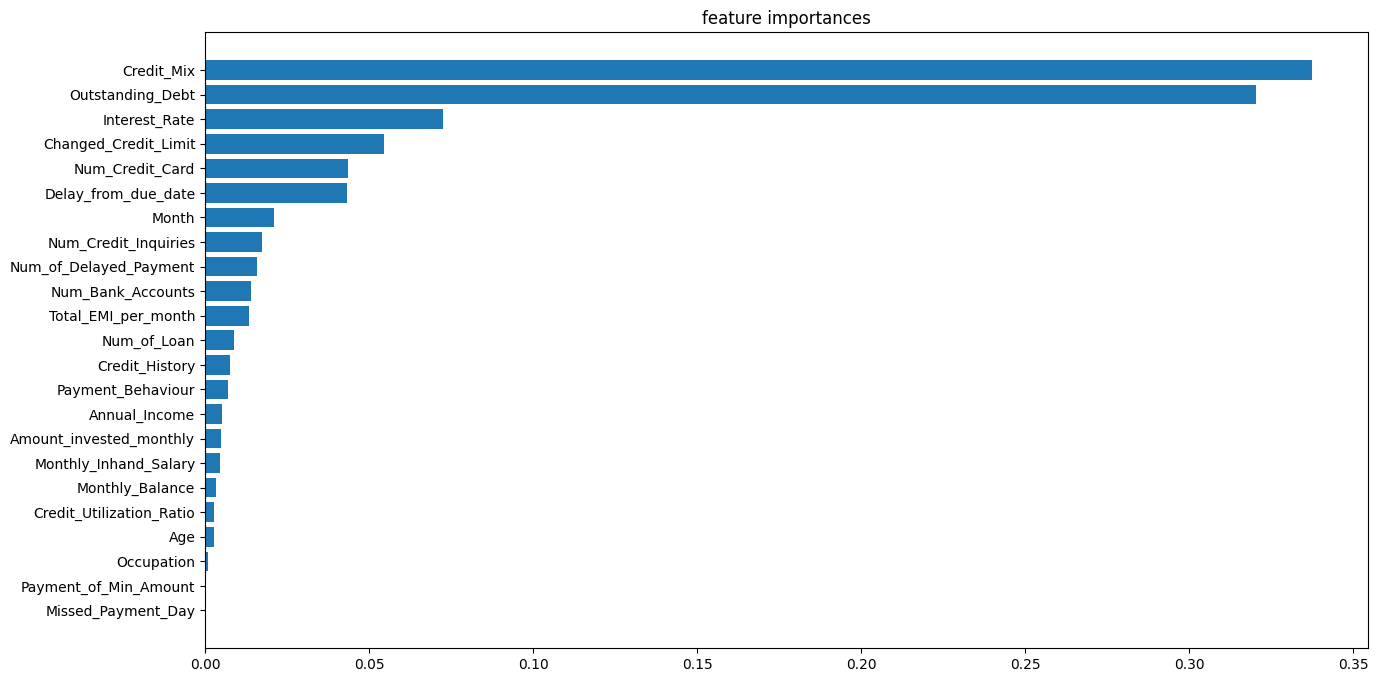

In [56]:
feature_importances(abs(xgb.feature_importances_), features)

### Voting Classifier

In [57]:
clf1 = LogisticRegression(C = 100)
clf2 = DecisionTreeClassifier(max_features=14 , max_depth=12)
clf3 = KNeighborsClassifier(n_neighbors=7)
clf4 = RandomForestClassifier(max_features=15 , max_depth=12)
clf5 = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)
clf6 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [58]:
voting = VotingClassifier(estimators=[("LogisticRegression" , clf1), ("DecisionTreeClassifier", clf2),
                                     ('KNeighborsClassifier' , clf3), ("RandomForestClassifier", clf4),
                                     ("AdaBoostClassifier",clf5), ("XGBClassifier" , clf6)] , voting = "hard")

In [59]:
voting.fit(x_train , y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LogisticRegression', LogisticRegression(C=100)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(max_depth=12,
                                                     max_features=14)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=7)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=12,
                                                     max_features=15)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(learning_r...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...))])

In [60]:
voting_score_train = voting.score(x_train, y_train)
voting_score_test = voting.score(x_test, y_test)

In [61]:
voting_score_train

0.7828

In [62]:
voting_score_test

0.7385

Training Accuracy Voting 78.28  Test Accuracy Voting 73.85000000000001


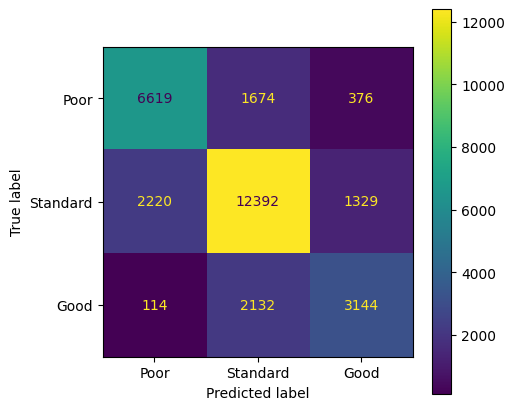

In [63]:
evaluate_classification(voting, "Voting", x_train,x_test,y_train,y_test)

In [64]:
y_pred = voting.predict(x_test)

In [65]:
v_f1_scores, v_macro_f1, v_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.75122007 0.77115032 0.61412247]
Macro-average F1 score: 0.7121642848467422
Weighted-average F1 score: 0.7371784687996372


In [66]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,0,1,0,2,1,1,1,1,1,1,0,2,2,0,1,1,0,0,1,0
Y_pred,0,1,0,1,1,1,1,1,1,1,0,2,2,0,1,1,0,1,1,0


### Accuracy Score

In [67]:
models = ['Logistic Regression' , 'KNN' , 'Decision Tree','Voting Classifier','Random Forest', 'AdaBoost', 'XGBoost']
score = [[lr_score_train ,lr_score_test ], [knn_score_train ,knn_score_test ], [dt_score_train ,dt_score_test ], 
       [voting_score_train, voting_score_test], [rf_score_train,rf_score_test], [ada_score_train ,ada_score_test],
       [xgb_score_train,xgb_score_test]]

# Rounding up each score to 4 decimal places
for i in range(len(score)):
    for j in range(len(score[i])):
        score[i][j] = round(score[i][j], 4)

cols = ["Train Score" , "Test Score"]
pd.DataFrame(data = score , index = models , columns= cols).sort_values(ascending= False , by = ["Test Score","Train Score"])

,Train Score,Test Score
Random Forest,0.7809,0.7404
Voting Classifier,0.7828,0.7385
Decision Tree,0.7739,0.7250
KNN,0.8085,0.7164
XGBoost,0.7155,0.7141
AdaBoost,0.6279,0.6267
Logistic Regression,0.5403,0.5391


### F1 Score

In [68]:
models = ['Logistic Regression' , 'KNN' , 'Decision Tree','Voting Classifier','Random Forest', 'AdaBoost', 'XGBoost']
score = [[lr_macro_f1, lr_weighted_f1], [knn_macro_f1, knn_weighted_f1], [dt_macro_f1, dt_weighted_f1], [v_macro_f1, v_weighted_f1], 
        [rf_macro_f1, rf_weighted_f1], [ada_macro_f1, ada_weighted_f1], [xgb_macro_f1, xgb_weighted_f1]]

# Rounding up each score to 4 decimal places
for i in range(len(score)):
    for j in range(len(score[i])):
        score[i][j] = round(score[i][j], 4)

cols = ["Macro - Average (F1 Score)" , "Weighted - Average (F1 Score)"]
pd.DataFrame(data = score , index = models , columns= cols).sort_values(ascending= False , by = ["Macro - Average (F1 Score)" , "Weighted - Average (F1 Score)"])


,Macro - Average (F1 Score),Weighted - Average (F1 Score)
Random Forest,0.7244,0.7417
Voting Classifier,0.7122,0.7372
Decision Tree,0.7051,0.7258
XGBoost,0.6955,0.7152
KNN,0.6846,0.7132
AdaBoost,0.5952,0.6235
Logistic Regression,0.3677,0.4725


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=762520ba-b8cf-4151-96d5-65e8763600e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>